In [1]:
import numpy as np
import sympy as sp
import scipy
import os
import time
from  matplotlib import pyplot as plt

In [6]:
os.system(f"./run.bat")

1

### Show that the Lane-Emden equation can be derived by combining hydrostatic equilibrium, a polytropic equation of state and the continuity equation.

Polytropic equation of state

$$P=K\rho^{1+\frac1n}$$

Continuity equation

$$\frac{dm}{dr}=4\pi r^2 \rho$$

Tolman-Oppenheimer-Volkoff equation

$$\frac{dP}{dr} = -\frac{Gm\rho}{r^2}(1+\frac{P}{\rho c^2})(1+\frac{4\pi r^2 P}{mc^2})(1-\frac{2Gm}{rc^2})^{-1}$$

Lane-Emden equation


$$\frac 1 {\xi^2} \frac d{d\xi}(\xi^2\frac{d\theta}{d\xi}) + \theta^n = 0$$

## Hand working for n=0, solution for LE

$$\frac 1 {\xi^2} \frac d{d\xi}(\xi^2\frac{d\theta}{d\xi}) + 1 = 0$$

$$\frac d{d\xi}(\xi^2\frac{d\theta}{d\xi}) = -\xi^2$$

$$\xi^2\frac{d\theta}{d\xi} = \int-\xi^2 d\xi$$

$$\xi^2\frac{d\theta}{d\xi} = C -\frac13\xi^3 $$

$$\frac{d\theta}{d\xi} = C -\frac13\xi $$

$${d\theta} = C -\frac13\xi {d\xi}$$

$$\theta(\xi) = \int [C -\frac13\xi ]{d\xi}$$

$$\theta(\xi) = D - \frac C\xi - \frac16\xi^2$$

Apply initial conditions $\theta(0) = 1, \theta'(0) \equiv \frac{d\theta}{d\xi}|_{\xi=0} = 0$

$$\theta'(\xi) = 0 = C - \frac13 \xi$$

$$\theta'(0) = 0 = C - \frac13 0$$

$$\Rightarrow C = 0$$

$$\theta(0) = 1 = D - \frac16 0$$

$$\Rightarrow D = 1$$

$$\theta(\xi) = 1 - \frac16\xi^2$$

## Hand working for n=1, solution for LE

$$\frac 1 {\xi^2} \frac d{d\xi}(\xi^2\frac{d\theta}{d\xi}) + \theta = 0$$

By the chain rule

$$\frac{d^2\theta}{d\xi^2} + \frac2\xi\frac{d\theta}{d\xi} + \theta = 0$$

Trying the Fourier transform to solve the 2nd order ODE

$$\theta''(\xi) + \frac2\xi \theta'(\xi) + \theta(\xi) = 0$$

Using the substitution that $\theta(\xi) = \frac{u(\xi)}{\xi}$

$$\theta(\xi) = \frac{u(\xi)}{\xi}$$
$$\theta'(\xi) = \frac{u'(\xi)\xi - u(\xi)}{\xi^2}$$
$$= \frac{u'(\xi)\xi}{\xi^2} - \frac{u(\xi)}{\xi^2}$$
$$= \frac{u'(\xi)}{\xi} - \frac{u(\xi)}{\xi^2}$$

$$\theta''(\xi) = \frac {u''(\xi)\xi - u'(\xi)}{\xi^2} - \frac{u'(\xi)\xi^2 - 2\xi u(\xi)}{\xi^4}$$
$$\theta''(\xi) = \frac{u''(\xi)}{\xi} - \frac{u'(\xi)}{\xi^2} - \frac{u'(\xi)\xi^2}{\xi^4} + \frac{2\xi u(\xi)}{\xi^4}$$
$$\theta''(\xi) = \frac{u''(\xi)}{\xi} - \frac{2u'(\xi)}{\xi^2} + \frac{2u(\xi)}{\xi^3}$$


Applying the substitution

$$\theta''(\xi) + \frac2\xi \theta'(\xi) + \theta(\xi) = 0$$

becomes

$$\frac{u''(\xi)}{\xi} - \frac{2u'(\xi)}{\xi^2} + \frac{2u(\xi)}{\xi^3} + \frac2\xi(\frac{u'(\xi)}{\xi} - \frac{u(\xi)}{\xi^2}) + \frac{u(\xi)}{\xi} = 0$$
$$\frac{u''(\xi)}{\xi} - \frac{2u'(\xi)}{\xi^2} + \frac{2u(\xi)}{\xi^3} +\frac{2u'(\xi)}{\xi^2} - \frac{2u(\xi)}{\xi^3} + \frac{u(\xi)}{\xi} = 0$$
$$\frac{u''(\xi)}{\xi} + \frac{u(\xi)}{\xi} = 0$$

Multiply by $\xi$

$$u''(\xi) + u(\xi) = 0$$

The second order ODE above has the general solution

$$X = A\cos(x) + B\sin(x) = Ae^{ix} + Be^{-ix}$$

Apply initial conditions $\theta(0) = 1, \theta'(0) \equiv \frac{d\theta}{d\xi}|_{\xi=0} = 0$

$$\theta(\xi) = \frac{A\cos(\xi)}{\xi} + \frac{B\sin(\xi)}{\xi}$$
$$\theta'(\xi) = \frac{-A\sin(\xi)\xi - A\cos(\xi)}{\xi^2} + \frac{B\cos(\xi)\xi - B\sin(\xi)}{\xi^2}$$
$$ = -\frac{A\xi\sin(\xi)}{\xi^2} - \frac{A\cos(\xi)}{\xi^2} + \frac{B\xi\cos(\xi)}{\xi^2} - \frac{B\sin(\xi)}{\xi^2}$$

Initial conditions must be applied by limits, thus the initial conditions are

$$\lim_{\xi\to0}\theta = 1$$
$$\lim_{\xi\to0}\frac{d\theta}{d\xi} = 0$$

For dynamical boundary condition

$$\lim_{\xi\to0}-\frac{A\xi\sin(\xi)}{\xi^2} - \frac{A\cos(\xi)}{\xi^2} + \frac{B\xi\cos(\xi)}{\xi^2} - \frac{B\sin(\xi)}{\xi^2} = 0$$

$$\lim_{\xi\to0}- \frac{A\cos(\xi)}{\xi^2} - \frac{B\sin(\xi)}{\xi^2} = 0$$

$$\Rightarrow A = 0$$

For static boundary condition

$$\lim_{\xi\to0}\frac{A\cos(\xi)}{\xi} + \frac{B\sin(\xi)}{\xi} = 1$$

$$\Rightarrow B = 1$$

So the solution is given by

$$\theta(\xi) = \frac{\sin(\xi)}{\xi} = \text{sinc}(\xi)$$

## Hand working for n=5, solution for LE

$$\frac 1 {\xi^2} \frac d{d\xi}(\xi^2\frac{d\theta}{d\xi}) + \theta^5 = 0$$

$$ \frac d{d\xi}(\xi^2\frac{d\theta}{d\xi}) = -\theta^5 \xi^2$$

$$2\xi\frac{d\theta}{d\xi} + \xi^2\frac{d^2\theta}{d\xi^2} = -\theta^5 \xi^2$$

higher order
substitution
direct integration
fourier
laplace

Solution should be by the end

$$\theta(\xi) = \frac1{\sqrt{1+\frac{\xi^2}{3}}}$$

### Solve the Lane-Emden equation analytically for n = 0, n = 1 and n = 5.

In [7]:
# 1/xi^2 d/dE (xi^2 dt/dxi) + t^n = 0
# t = t(xi), p = p_0 t^n, t(0) = 1, dt/dE |_E=0 = 0

n = 0

theta = sp.Function('θ')
xi = sp.symbols("ξ")
dthetadxi = theta(xi).diff(xi)

sp.dsolve(1/(xi**2) * (xi**2 * dthetadxi).diff(xi) + theta(xi)**n, theta(xi), ics={theta(0):1, theta(xi).diff(xi).subs(xi, 0) : 0})

Eq(θ(ξ), 1 - ξ**2/6)

### Solve the TOV equation for a constant density ρ(r) = ρ0. Do you think this is a physically valid solution?

Tolman-Oppenheimer-Volkoff equation

$$\frac{dP}{dr} = -\frac{Gm\rho}{r^2}(1+\frac{P}{\rho c^2})(1+\frac{4\pi r^2 P}{mc^2})(1-\frac{2Gm}{rc^2})^{-1}$$

Solving the TOV with $\rho(r) = \rho_0$

## Numerical solving of Lane-Emden equation

$$\frac 1 {\xi^2} \frac d{d\xi}(\xi^2\frac{d\theta}{d\xi}) + \theta^n = 0$$

$$ \frac d{d\xi}(\xi^2\frac{d\theta}{d\xi}) = -\theta^n \xi^2$$

$$2\xi\frac{d\theta}{d\xi} + \xi^2\frac{d^2\theta}{d\xi^2} = -\theta^n \xi^2$$

$$\xi\frac{d^2\theta}{d\xi^2} + 2\frac{d\theta}{d\xi} + \theta^n \xi = 0$$

## Numerical version using Runge-Kutta 4

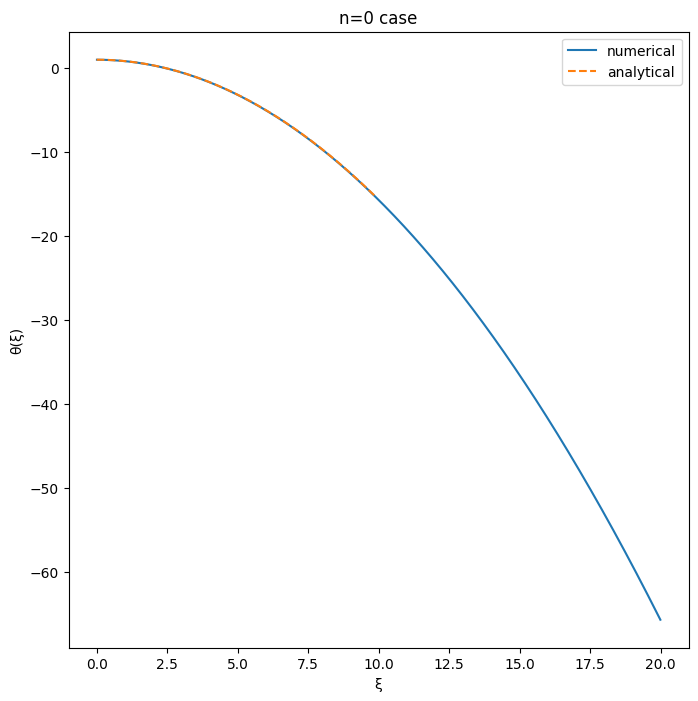

In [25]:
def funcn1(x): return 1.0 - 1.0/6.0 * x*x

f = np.loadtxt("./laneEmdenSolutions.csv", delimiter=",")

xi_analytical = np.arange(0.001,10,0.1) #xi = 0 breaks so  used 0.001
theta_analytical = funcn1(xi_analytical)

plt.figure(figsize=[8,8])
plt.title("n=0 case")
plt.plot(f.T[0],f.T[5],label="numerical")
plt.plot(xi_analytical,theta_analytical,label="analytical", linestyle='dashed')
plt.xlabel("ξ")
plt.ylabel("θ(ξ)")
plt.legend()
plt.show()

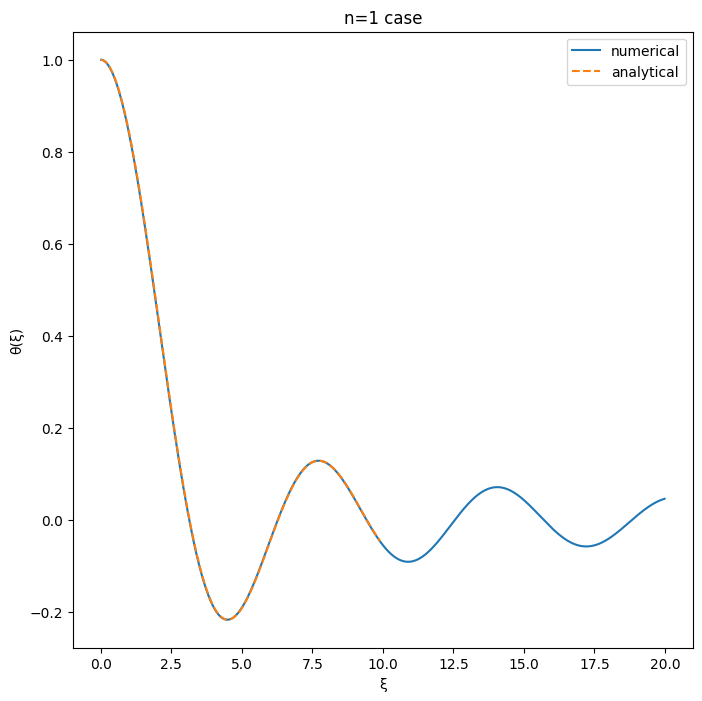

In [26]:
def funcn1(x): return np.sin(x)/x

xi_analytical = np.arange(0.001,10,0.1) #xi = 0 breaks so  used 0.001
theta_analytical = funcn1(xi_analytical)

plt.figure(figsize=[8,8])
plt.title("n=1 case")
plt.plot(f.T[0],f.T[7],label="numerical")
plt.plot(xi_analytical,theta_analytical,label="analytical", linestyle='dashed')
plt.xlabel("ξ")
plt.ylabel("θ(ξ)")
plt.legend()
plt.show()

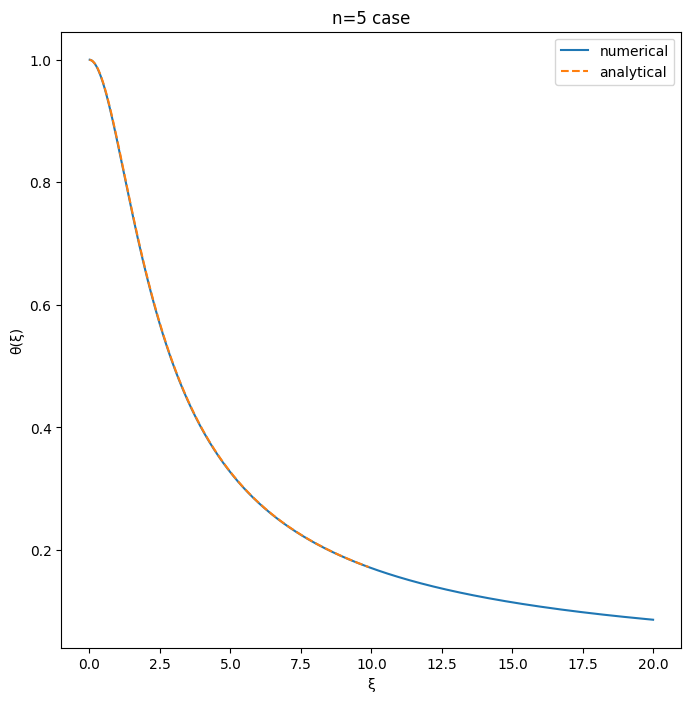

In [27]:
def funcn1(x): return 1.0/np.sqrt(1.0+(x*x)/3.0)

xi_analytical = np.arange(0.001,10,0.1) #xi = 0 breaks so  used 0.001
theta_analytical = funcn1(xi_analytical)

plt.figure(figsize=[8,8])
plt.title("n=5 case")
plt.plot(f.T[0],f.T[15],label="numerical")
plt.plot(xi_analytical,theta_analytical,label="analytical", linestyle='dashed')
plt.xlabel("ξ")
plt.ylabel("θ(ξ)")
plt.legend()
plt.show()

Though this does explode that does seem to be the expected behaviour as this is a non-physical solution as the mass is infinite.

## Solving TOV and LE

Polytropic equation of state

$$P=K\rho^{1+\frac1n}$$
Continuity equation

$$\frac{dm}{dr}=4\pi r^2 \rho$$
Tolman-Oppenheimer-Volkoff equation

$$\frac{dP}{dr} = -\frac{Gm\rho}{r^2}(1+\frac{P}{\rho c^2})(1+\frac{4\pi r^2 P}{mc^2})(1-\frac{2Gm}{rc^2})^{-1}$$
Lane-Emden equation


$$\frac 1 {\xi^2} \frac d{d\xi}(\xi^2\frac{d\theta}{d\xi}) + \theta^n = 0$$

$$ R = \alpha \xi_1$$

$$\alpha = \sqrt{(n+1)K\rho_x^{1/n-1} / 4\pi G}$$

Suppose

$$P(r=0)=P_0$$
$$m(r=0)=0$$
$$\rho=\rho_c$$



Continuity equation

$$\frac{dm}{dr}=4\pi r^2 \rho$$


$$M = \int_0^R 4\pi r^2 \rho$$

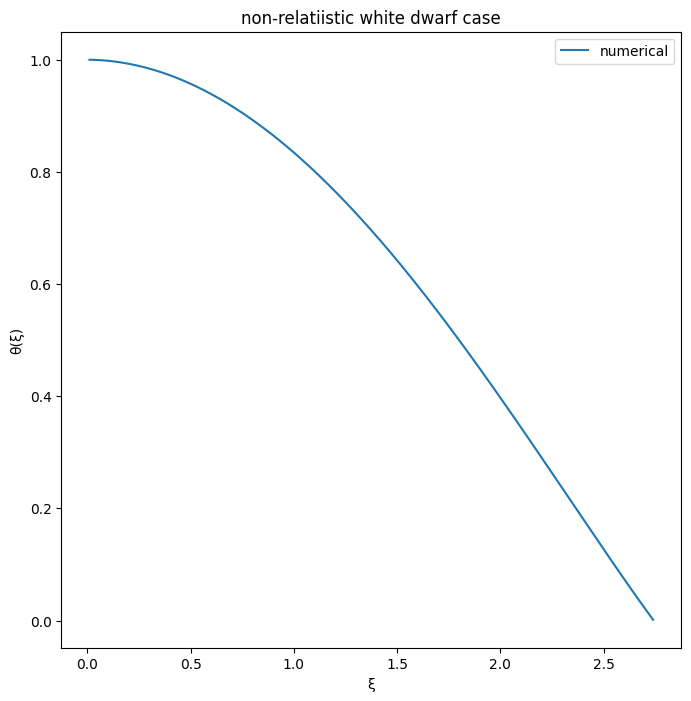

In [12]:
plt.figure(figsize=[8,8])
plt.title("non-relatiistic white dwarf case")
plt.plot(f.T[0],f.T[6],label="numerical")
plt.xlabel("ξ")
plt.ylabel("θ(ξ)")
plt.legend()
plt.show()


should be on the order of $10^7~\text{m}$ and $3\cdot 10^{30} kg$

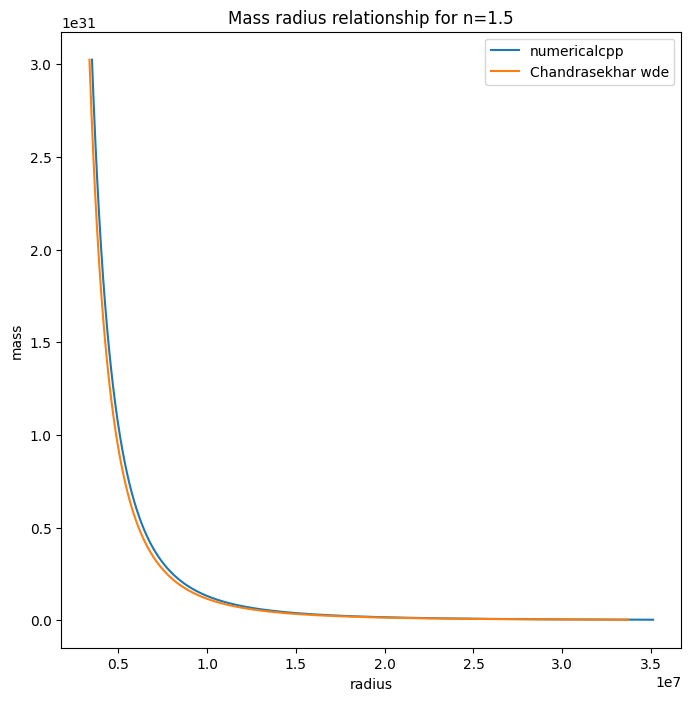

In [28]:
rho_min = 10**8
rho_max = 10**14
runs = 10000
mu_e = 2

f = np.loadtxt("./massRadius1_5.csv", delimiter=",")

r = f.T[1]
m = f.T[0]

M_sun = 1.98847e30
R_sun = 6.957e8

y = np.linspace(min(m), max(m), runs)  # mass in kg

x = (
    0.012
    * (y / M_sun)**(-1/3)
    * (mu_e / 2)**(-5/3)
) * R_sun

plt.figure(figsize=[8,8])
plt.title("Mass radius relationship for n=1.5")
plt.plot(r, m, label="numericalcpp")
plt.plot(x, y, label="Chandrasekhar wde")
plt.xlabel("radius")
plt.ylabel("mass")
plt.legend()
plt.show()

## MUST CHANGE SUM FROM BASIC RIEMANN SUM TO USE A BETTER INTERPOLATING METHOD AND INCLUDE THE FIRST DIVISION AS IT IS CURRENTLY EXCLUDED

## Solving TOV for relativistic stars

Polytropic equation of state

$$P=K\rho^{1+\frac1n}$$
Continuity equation

$$\frac{dm}{dr}=4\pi r^2 \rho$$
Tolman-Oppenheimer-Volkoff equation

$$\frac{dP}{dr} = -\frac{Gm\rho}{r^2}(1+\frac{P}{\rho c^2})(1+\frac{4\pi r^2 P}{mc^2})(1-\frac{2Gm}{rc^2})^{-1}$$

Suppose

$$P(r=R)=0$$
$$P(r=0)=P_0$$
$$m(r=0)=0$$
$$\rho=\rho_c$$

Then solve

$$M = \int_0^R 4\pi r^2 \rho dr$$

Apply PeS to TOV

$$m(r) = \int_0^r 4\pi r^2 \rho dr$$

$$\frac{dP}{dr} = -\frac{Gm\rho}{r^2}(1+\frac{P}{\rho c^2})(1+\frac{4\pi r^2 P}{mc^2})(1-\frac{2Gm}{rc^2})^{-1}$$
$$P=K\rho^{1+\frac1n}$$
$$\rho=(\frac PK)^{\frac{n}{n+1}}$$
$$\frac{dP}{dr} = -\frac{Gm(r)(\frac PK)^{\frac{n}{n+1}}}{r^2}(1+\frac{P}{(\frac PK)^{\frac{n}{n+1}} c^2})(1+\frac{4\pi r^2 P}{m(r)c^2})(1-\frac{2Gm(r)}{rc^2})^{-1}$$
$$\frac{dP}{dr} = -\frac{G(\int_0^r 4\pi r^2 (\frac PK)^{\frac{n}{n+1}} dr)(\frac PK)^{\frac{n}{n+1}}}{r^2}(1+\frac{P}{(\frac PK)^{\frac{n}{n+1}} c^2})(1+\frac{4\pi r^2 P}{(\int_0^r 4\pi r^2 (\frac PK)^{\frac{n}{n+1}} dr)c^2})(1-\frac{2G(\int_0^r 4\pi r^2 (\frac PK)^{\frac{n}{n+1}} dr)}{rc^2})^{-1}$$


$$P(r_0)=P_c$$
$$m(r_0)=0$$

$$P_{i+1} = P_i + \frac h6(k_1 + 2k_2 + 2k_3 + k_4)$$
$$M_{i+1} = M_i + \frac h6(k_1 + 2k_2 + 2k_3 + k_4)$$
$$r_{i+1} = r_i + h$$